In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [6]:
Min, Max, N = 0., 40.,51
x=np.linspace(Min,Max,N)
y=np.linspace(Min,Max,N)
h=x[1]-x[0]


In [7]:
def h1(y):
    return 100.
def h2(y):
    return 10.
def h3(x):
    return 50.
def h4(x):
    return 0.

In [8]:
def InitT():
    T=np.zeros((N,N))
    T[0,:]=h1(y)
    T[-1,:]=h2(y)
    T[:,0]=h3(x)
    T[:,-1]=h4(x)
    return T


In [9]:
T=InitT()
print(T)


[[ 50. 100. 100. ... 100. 100.   0.]
 [ 50.   0.   0. ...   0.   0.   0.]
 [ 50.   0.   0. ...   0.   0.   0.]
 ...
 [ 50.   0.   0. ...   0.   0.   0.]
 [ 50.   0.   0. ...   0.   0.   0.]
 [ 50.  10.  10. ...  10.  10.   0.]]


In [15]:
def GetOverRelaxation(T, omega,Nit=int(1e5), tolerance = 1e-2):
    itmax=0
    
    for it in tqdm(range(Nit)):
        dmax=0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp=0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r=omega*(tmp-T[i,j])
                
                T[i,j] +=r
                
                if np.abs(r) > dmax:
                    dmax=r
        if np.abs(dmax)<tolerance:
            print(it)
            itmax=it
            break
    return T,itmax


In [27]:

Itmax=np.zeros(11)
Omega=np.linspace(1,1.9,11)
for i in range(len(Omega)):
    T=InitT()
    Tf1,Itmax[i]=GetRelaxation(T, omega=Omega[i], Nit=int(1e5), tolerance = 1e-2)




  0%|          | 16/100000 [00:00<10:36, 157.01it/s]

811


  0%|          | 16/100000 [00:00<10:29, 158.73it/s]

714


  0%|          | 16/100000 [00:00<10:27, 159.35it/s]

624


  0%|          | 16/100000 [00:00<10:48, 154.13it/s]

542


  0%|          | 14/100000 [00:00<12:39, 131.65it/s]

466


  0%|          | 16/100000 [00:00<10:32, 158.04it/s]

394


  0%|          | 16/100000 [00:00<10:42, 155.56it/s]

326


  0%|          | 26/100000 [00:00<13:24, 124.22it/s]

260


  0%|          | 14/100000 [00:00<12:08, 137.30it/s]

196


  0%|          | 16/100000 [00:00<10:48, 154.19it/s]

131


  0%|          | 44/100000 [00:00<14:30, 114.77it/s]

52


<IPython.core.display.Javascript object>


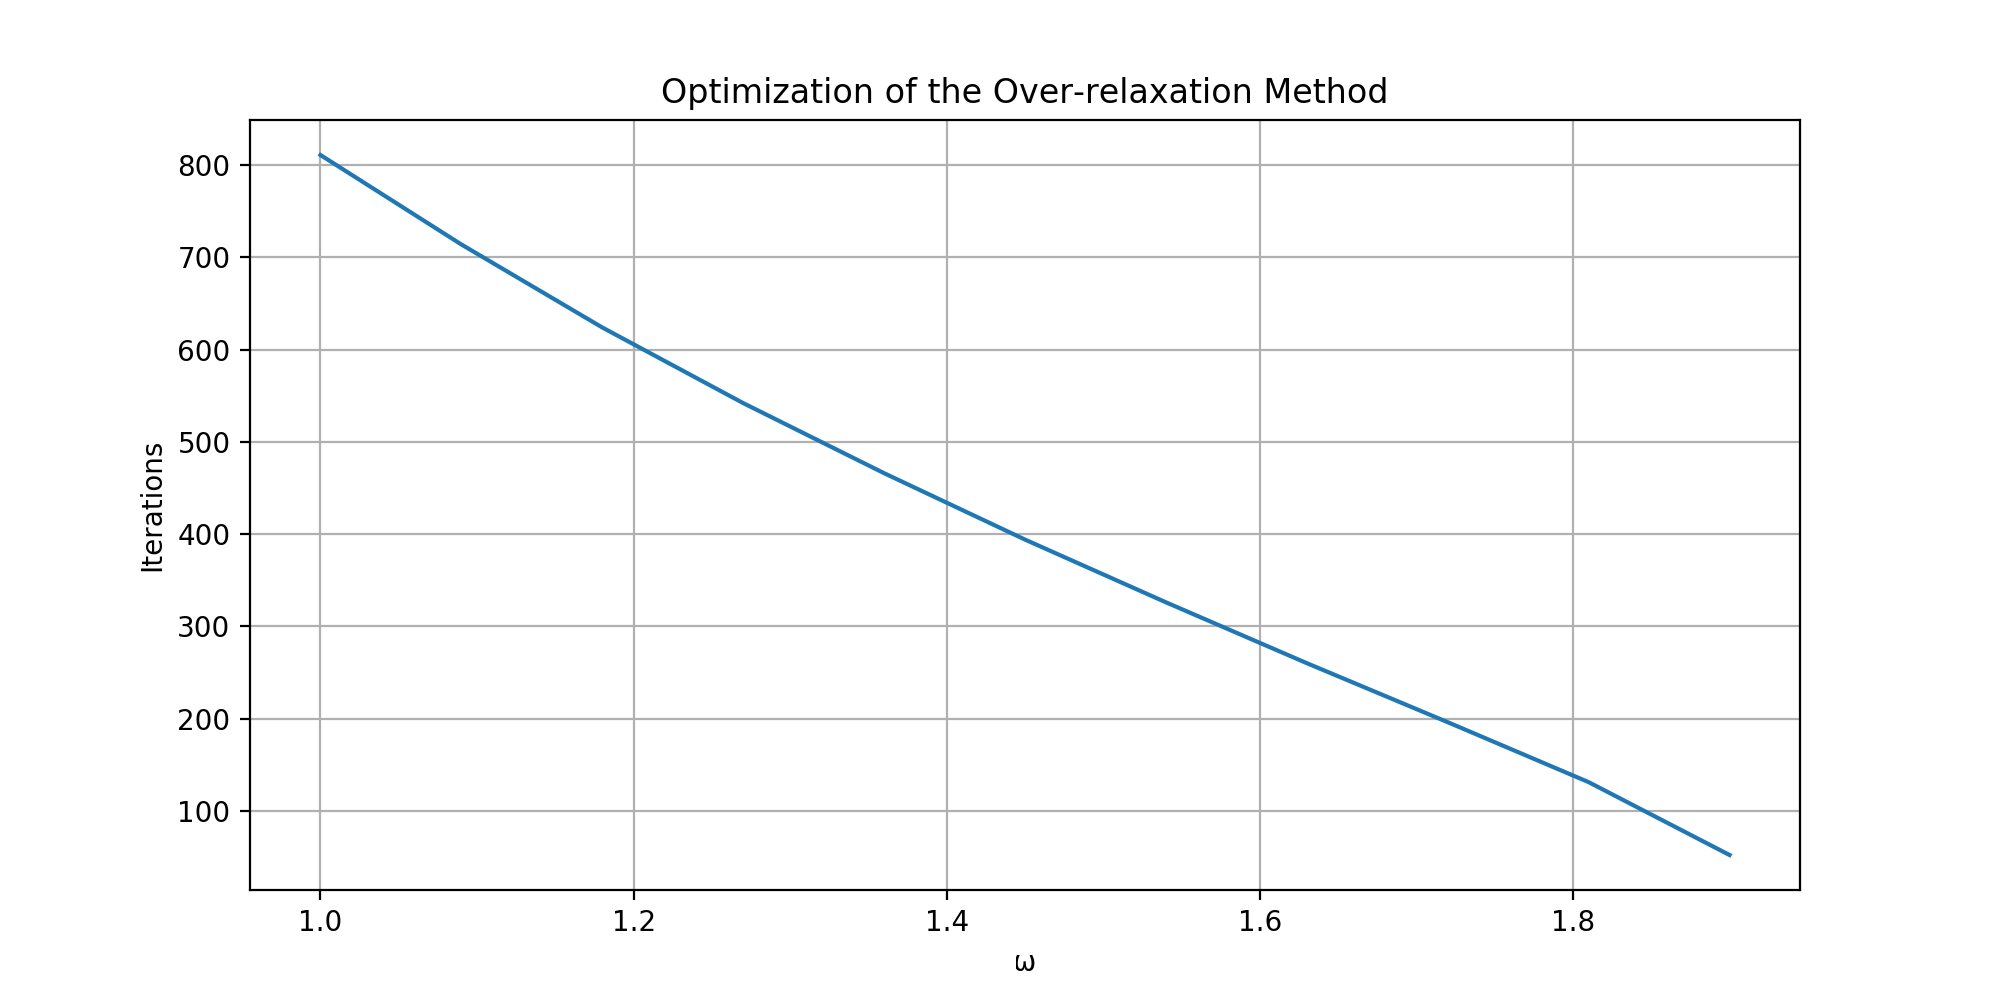

Cuando omega toma un valor muy cercano a 2, el número de iteraciones se vuelve muy pequeño en comparación con omega iguala a 1. Además, cuando omega ya es igual o mayor a 2, se vuelve divergente y esta regla es general.


In [28]:
fig = plt.figure(figsize=(10,5))
plt.plot(Omega, Itmax)
plt.xlabel('ω')
plt.ylabel('Iterations')
plt.title('Optimization of the Over-relaxation Method')
plt.grid()

print("Cuando omega toma un valor muy cercano a 2, el número de iteraciones se vuelve muy pequeño en comparación con omega iguala a 1. Además, cuando omega ya es igual o mayor a 2, se vuelve divergente y esta regla es general.")

In [ ]:
#0.4 Parámetros de la simulación

In [35]:
v0=1
v=0.2
N=51
h=0.02
R=v0*h/v

plotmin=[5,5]
plotmax=[25,30]


W = np.zeros((N,N))
U = np.zeros((N,N))


In [36]:
print(W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:

def boundary_conditions():
    for i in range(plotmin[0], plotmax[0]+1):
        for j in range(plotmin[1], plotmax[1]+1):
            U[plotmin[0],i]=0.
            U[plotmin[0],i]=0. 
            U[j,plotmin[1]]=0.
            U[j,plotmin[0]]=0.
            W[0,j]= -2*(U[1,j] - U[0,j])/(h**2)
            W[-1,j] = -2*(U[-2,j] - U[-1,j])/(h**2)
            W[i,0]=-2*(U[i,1]-U[i,0])/h**2
            W[i,-1] = -2*(U[i,-2] - U[i,-1])/(h**2)


def discretizacion(Nit=int(1e5), tolerance = 1e-2, omega=0.7):
    for e in range(len(Nit)):
        for j in range(N):
            U[-1,j] = U[-2,j] + v0*h*y[-1]
            U[0,j] = U[1,j]
            U[j,0] = U[j,1]
            U[j,-1] = U[j,-2]
        boundary_conditions()
        
        max1, max2=0,0
        
        
            
        for i in range(1,50):
            for j in range(1,50):
                
                if (plotmax[1] +1>i > plotmin[1]+1) and (plotmax[0] +1> j > plotmin[0]+1):
                    U[i,j], W[i,j] = 0,0
                    
                else:
                    w1 = 0.25*(W[j,i+1]+W[j,i-1]+W[j-1,i]+W[j+1,i])
                    w2 = -(R/16)*(U[j,i+1]-U[j,i-1])*(W[j+1,i]-W[j-1,i])
                    w3 = (R/16)*(W[j,i+1]-W[j,i-1])*(U[j+1,i]-U[j-1,i])
                    
                    r = omega*(w1+w2+w3-W[j,i])
                    W[j,i] += r
                    
                    if np.abs(r) > max1:
                        dmax2 = r
                        
                    u = 0.25*(U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1] + W[i,j]*h**2)
                    r_u = omega*(u - U[i,j])
                    U[i,j]+=r_u
                    
                    if np.abs(r_u) > max2:
                        max1 = r_u
                        
        if (np.abs(max1) < tol) and (np.abs(max2) < tol):
            print(it)
            break
    
    
            
    
            